# UTS

Nama : Izul Ramdani

NIM : 200411100111

Kelas : Penambangan Data A

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi



*   metode KNN
*   metode pohon keputusan (Desision tree)



**Metode KNN**

Metode KNN adalah metode yang melakukan klasifikasi terhadap objek berdasarkan data pembelajaran yang jaraknya paling dekat dengan obyek tersebut. KNN termasuk algoritma supervised learning. Supervised learning merupakan suatu pembelajaran yang terawasi dimana jika output yang diharapkan telah diketahui sebelumnya.

Tahapan






1. Tahapan pertama adalah memasukkan nilai k, sedangkan nilai k minimalnya adalah 1 dan maksimalnya adalah jumlah set data latih

2. Melakukan normalisasi untuk semua pola set data latih ataupun set data uji. Hal ini bertujuan supaya rentang keseluruhan nilai pola memiliki rentang nilai yang sama, antara 0 sampai 1. Perhitungan normalisasi yang digunakan adalah metode min-max. datax adalah data yang akan dihitung normalisasinya yang diambil berdasarkan kolom datanya. datamin adalah data terkecil di kolom yang sama datamax adalah data terbesar di kolom yang sama dengan data yang akan dinormalisasi.

3. Menghitung jarak Euclidean yang akan disimbolkan sebagai deuclidean (x,y). dimana i adalah banyaknya set data dan x adalah jumlah set data uji, sedangkan y adalah set data latih. Tahap selanjutnya adalah lakukan voting atau pemilihan dari jarak euclidean terkecil yang masuk peringkat sejumlah nilai k. Langkah terakhir adalah menentukan hasil klasifikasi berdasarkan tahap keempat yang terbanyak.

In [ ]:
import pandas as pd
## membaca data menggunakan pandas
url = "https://raw.githubusercontent.com/123akuizul/datamining/main/dataR2.csv"
df = pd.read_csv(url)
#cek data sudah terbaca dengan benar
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
# tampilkan 15 baris pertama
df.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [ ]:
#periksa jumlah baris dan kolom dalam dataset
df.shape

(116, 10)

In [ ]:
#buat kerangka data dengan semua data pelatihan kecuali kolom target
X = df.drop(columns=["Classification"])
#periksa apakah variabel target telah dihapus
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
#nilai target terpisah
y = df["Classification"].values
#lihat nilai target
y[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
#bagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Buat pengklasifikasi KNN
knn = KNeighborsClassifier(n_neighbors = 3)
# Sesuaikan pengklasifikasi dengan data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#tampilkan 5 prediksi model pertama pada data uji
knn.predict(X_test)[0:5]

array([1, 2, 1, 2, 2])

In [ ]:
#periksa keakuratan model kami pada data uji
knn.score(X_test, y_test)

0.3333333333333333

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#buat model KNN baru
knn_cv = KNeighborsClassifier(n_neighbors=3)
#model kereta api dengan cv 5
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#cetak setiap skor cv (akurasi) dan rata-ratakan
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.5        0.52173913 0.47826087 0.47826087 0.60869565]
cv_scores mean:0.5173913043478261


In [ ]:
from sklearn.model_selection import GridSearchCV
#buat model knn baru
knn2 = KNeighborsClassifier()
#buat kamus semua nilai yang ingin kami uji untuk n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch untuk menguji semua nilai untuk n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#menyesuaikan model dengan data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#periksa nilai n_neighbors berkinerja terbaik
knn_gscv.best_params_

{'n_neighbors': 23}

In [ ]:
#periksa skor rata-rata untuk nilai kinerja terbaik dari n_neighbors
knn_gscv.best_score_

0.5688405797101449

Text(0, 0.5, 'Mean Error')

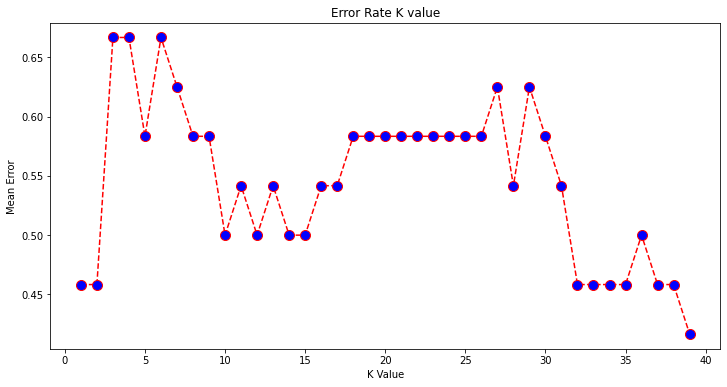

In [ ]:
# Menghitung kesalahan untuk nilai K antara 1 dan 40
error = []
import matplotlib.pyplot as plt
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', 
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')